
# Analytical Case Study 
##### Esra Arı


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#Question1">Question1</a></li>
<li><a href="#Question2">Question2</a></li>
<li><a href="#Question3">Question3</a></li>
<li><a href="#Question4">Question4</a></li>
<li><a href="#Question5">Question5</a></li>
<li><a href="#Question6">Question6</a></li>
<li><a href="#Question7">Question7</a></li>
</ul>

<a id='intro'></a>
## Introduction

This analysis mainly aims to find a way to decide which one of these clients without financials have actually over 5 million TL net sales. With this aspect, basic statistitical analysis has been studied in the data wrangling part and questions have been answered in the following.

<a id='wrangling'></a>
## Data Wrangling

> * Load in the data, 
> * Check for cleanliness,  
> * If necessary trim and clean for analysis.

Before exploring the dataset, necessary modules are imported for the analysis. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import Imputer
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
% matplotlib inline

C:\Users\U083682\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In this section we are going to upload and look up the table and basic statistic to gain some inside for the questions.

In [4]:
df = pd.read_csv("GB_RATI_AnalyticalCaseStudy_Data.csv")
df.sample(10)

,YEAR,Customer_num,Establishment_Date,Number_of_Emp,Profit,Sector,Region,Total Risk,Total Limit,Sales
8738,2016,RATI5805YXI,38150,42.0,NaN,MANUFACTURING,NaN,956544.0,4297456.0,3
661,2015,RATI8155IDO,39143,6.0,44880.0,MANUFACTURING,Marmara Region,600226.0,3544291.0,0
5273,2012,RATI1930VVL,39100,10.0,122334.0,MANUFACTURING,Marmara Region,257573.0,1739869.0,0
4773,2011,RATI1725NCY,35259,2.0,52975.0,OTHERS,Marmara Region,733.0,331180.0,0
10236,2011,RATI4512HYI,39097,3.0,NaN,RETAIL-WHOLESALE,Aegean Region,152464.0,190558.0,3
1991,2015,RATI2777TPB,32186,4.0,NaN,RETAIL-WHOLESALE,Marmara Region,25648.0,113589.0,3
1645,2011,RATI1415KYL,37722,11.0,-8166.0,RETAIL-WHOLESALE,NaN,263633.0,310712.0,0
7118,2012,RATI1050RGH,37960,22.0,NaN,OTHERS,NaN,290835.0,812033.0,3
4548,2010,RATI6786KCE,34091,NaN,107727.0,MANUFACTURING,Marmara Region,302708.0,616672.0,1
1437,2015,RATI2416HXD,37308,4.0,NaN,RETAIL-WHOLESALE,Marmara Region,34307.0,136797.0,3


At first glance, it seems that there is a clean dataset. 
* As the case stated, bank does not have current financial statement for each company that can be seen in Profit column  as there are null values and in Sales column the value 3 indicates no information

* Also, we have some data quality issues in the establisment_date column

In [5]:
df.shape

(11357, 10)

Dataset includes approximately 11K rows and 10 colomns/features

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11357 entries, 0 to 11356
Data columns (total 10 columns):
YEAR                  11357 non-null int64
Customer_num          11357 non-null object
Establishment_Date    11357 non-null int64
Number_of_Emp         10771 non-null float64
Profit                8526 non-null float64
Sector                11357 non-null object
Region                10118 non-null object
Total Risk            11192 non-null float64
Total Limit           11192 non-null float64
Sales                 11357 non-null int64
dtypes: float64(4), int64(3), object(3)
memory usage: 887.3+ KB


* As expected there are some null values in the features which are number_of_Emp, Profit, Sector, Region; because bank does not have these information

* I also observe that there are null values in Total Risk and Total Limit features; because they may be newly opened companies

In [7]:
df.describe()

,YEAR,Establishment_Date,Number_of_Emp,Profit,Total Risk,Total Limit,Sales
count,11357.000000,11357.000000,10771.000000,8.526000e+03,1.119200e+04,1.119200e+04,11357.000000
mean,2013.939421,37291.960729,16.611642,6.138343e+04,1.249427e+06,2.536513e+06,0.874791
std,2.216296,2828.828350,84.039303,4.084090e+05,4.356318e+07,1.862993e+07,1.267010
min,2010.000000,18.000000,1.000000,-1.828452e+07,0.000000e+00,2.831000e+03,0.000000
25%,2012.000000,35427.000000,4.000000,1.349725e+04,1.197878e+05,5.153302e+05,0.000000
50%,2014.000000,37804.000000,7.000000,4.505250e+04,3.953125e+05,1.291620e+06,0.000000
75%,2016.000000,39445.000000,16.000000,1.165898e+05,1.006619e+06,2.931796e+06,1.000000
max,2017.000000,42535.000000,3333.000000,3.724579e+06,4.602535e+09,1.894825e+09,3.000000


Here we have some summary statistics for numeric variables
* Oldest information comes from the year 2010, newest one is the year 2017 
* Establisment_Date needs to be renamed; because, it is not a date. It can be number of days since company was founded
* Sales feature needs to be converted to object from numeric data type
* Profit takes negative values that may be logical
* Total Risk, Total Limit and Sales columns do not have any outstanding major problems. Total Risk and Total Limit labels maybe renamed due to blank in the labeling

In [8]:
df.Sector.value_counts()

RETAIL-WHOLESALE    5752
MANUFACTURING       2897
OTHERS              1798
SERVICES             910
Name: Sector, dtype: int64

In [9]:
df.Region.value_counts()

Marmara Region                  5166
Central Anatolia Region         1540
Aegean Region                   1212
Mediterranean Region            1129
Black Sea Region                 477
Southeastern Anatolia Region     398
Eastern Anatolia Region          196
Name: Region, dtype: int64

In [10]:
df.Sales.value_counts()

0    7084
3    2831
1    1442
Name: Sales, dtype: int64

Here we have the distribution of categorical variables
* Most companies operate on the retail sector in the Marmara region
* Both Sector and Region features seem to be very clean
* Only 2831 observations do not have sales information, they need to be excluded before performing any predictive analysis

In [11]:
df.YEAR.value_counts()

2017    1767
2016    1724
2015    1604
2014    1527
2013    1394
2012    1294
2011    1129
2010     918
Name: YEAR, dtype: int64

* Old data exists in the dataset. Data which is older than a certain level may be considered to be excluded from dataset as a business perspective; because, data may lose its informative value

In [12]:
df[df.iloc[:,1:2].duplicated()].head()

,YEAR,Customer_num,Establishment_Date,Number_of_Emp,Profit,Sector,Region,Total Risk,Total Limit,Sales
100,2016,RATI9475NNY,36789,1.0,-52876.0,MANUFACTURING,Central Anatolia Region,58386.0,1503634.0,0
105,2013,RATI9475NNY,36792,1.0,-14572.0,MANUFACTURING,Central Anatolia Region,70887.0,1943044.0,0
134,2014,RATI9571DKB,36697,1.0,13361.0,MANUFACTURING,Central Anatolia Region,61918.0,435756.0,0
174,2010,RATI1077KXC,33455,NaN,NaN,RETAIL-WHOLESALE,Aegean Region,21417.0,1808611.0,3
198,2015,RATI7201XMY,38955,30.0,NaN,RETAIL-WHOLESALE,Aegean Region,144858.0,1980660.0,3


* It can be seen that there are duplicated customerid's. Data needs to be unique in terms of clients; clients latest information could be extracted from data.

In [13]:
df.columns

Index(['YEAR', 'Customer_num ', 'Establishment_Date', 'Number_of_Emp',
       'Profit', 'Sector', 'Region', 'Total Risk ', 'Total Limit', 'Sales'],
      dtype='object')

* It can be seen that there are problematic column names which have unecessary blanks

<a id='Question1'></a>
## Question1

Do you think this data is suitable for modeling, if it is not, what improvements should be done?

We have very basic dataset. Features and target are clearly defined. However, following tidiness and quality issues that found from at the data wrangling part, is needed to be solved.

* Labels should be renamed especially for 'Customer_num ', 'Total Risk ', 'Total Limit' and 'Establishment_Date' columns
* There are duplicated customer id's. Data should be unique in terms of customer id; therefore, customers's latest information can be used for further analysis
* Sales needs to be converted factor format and observations which have 3 value in the Sales columns need to be excluded from dataset
* Missing value treatment should be done for null values and standardization should be applied before diving into any modeling
* To use categorical data in the modeling, they are needed to be encoded

Apart from improvable issues that claimed above, there are so some points that needs to be considered.

* More information may be added into dataset such as payment amount to justify the balance of client or information about company's sector position or its culture that Mrs. Sevinç stated to find out the exception

* Old data exists in the dataset. Data which is older than a certain level maybe considered to be excluded from dataset as a business perspective; because, data may  lose its informative value

* Final but not least, target rate should be investigated during time period to check whether it is stable, or not



## Cleaning Data

In this section, I am going to define the problem which are listed in Question1, code the solution then test the code sequentialy.

In [14]:
df_clean = df.copy()

#### Define (1)

Labels should be renamed especially for 'Customer_num ', 'Total Risk ', 'Total Limit' and 'Establishment_Date' columns.

#### Code

In [15]:
df_clean = df_clean.rename(columns={'Customer_num ' :'Customer_num',
                                    'Establishment_Date' : 'Customer_day_tenure',
                                    'Total Risk ':'Total_Risk',
                                    'Total Limit': 'Total_Limit'})

#### Test

In [16]:
df_clean.columns

Index(['YEAR', 'Customer_num', 'Customer_day_tenure', 'Number_of_Emp',
       'Profit', 'Sector', 'Region', 'Total_Risk', 'Total_Limit', 'Sales'],
      dtype='object')

#### Define(2)

There are duplicated customer id's. Data should be unique in terms of customer id while taking the latest information of client.

#### Code

In [17]:
df_clean = df_clean.groupby('Customer_num', group_keys=False).apply(lambda x: x.loc[x.YEAR.idxmax()])

#### Test

In [18]:
df.loc[df['Customer_num '] == 'RATI9475NNY', ]

,YEAR,Customer_num,Establishment_Date,Number_of_Emp,Profit,Sector,Region,Total Risk,Total Limit,Sales
25,2015,RATI9475NNY,36799,1.0,38313.0,MANUFACTURING,Central Anatolia Region,54008.0,1521978.0,0
100,2016,RATI9475NNY,36789,1.0,-52876.0,MANUFACTURING,Central Anatolia Region,58386.0,1503634.0,0
105,2013,RATI9475NNY,36792,1.0,-14572.0,MANUFACTURING,Central Anatolia Region,70887.0,1943044.0,0
1549,2014,RATI9475NNY,36791,1.0,NaN,MANUFACTURING,Central Anatolia Region,37175.0,1811846.0,3
4031,2011,RATI9475NNY,36807,1.0,28832.0,MANUFACTURING,Central Anatolia Region,394075.0,547229.0,0
6790,2010,RATI9475NNY,36811,1.0,22443.0,MANUFACTURING,Central Anatolia Region,159931.0,497849.0,0
11284,2012,RATI9475NNY,36803,1.0,15461.0,MANUFACTURING,Central Anatolia Region,67113.0,1919368.0,0


In [19]:
df_clean.loc[df_clean['Customer_num'] == 'RATI9475NNY', ]

,YEAR,Customer_num,Customer_day_tenure,Number_of_Emp,Profit,Sector,Region,Total_Risk,Total_Limit,Sales
Customer_num,,,,,,,,,,
RATI9475NNY,2016,RATI9475NNY,36789,1.0,-52876.0,MANUFACTURING,Central Anatolia Region,58386.0,1503634.0,0


#### Define(3)

Sales needs to be converted factor format and observations which have 3 value in the Sales columns need to be excluded from dataset.

#### Code

In [20]:
df_clean['Sales'] = df_clean['Sales'].astype(int)


In [21]:
df_clean = df_clean[df_clean.Sales != 3]

#### Test

In [22]:
df_clean.Sales.value_counts()

0    2412
1     634
Name: Sales, dtype: int64

<a id='Question2'></a>
## Question2

What is your opinion about Mr. Yılmaz’s assumption that “clients with more than 5 million risks in banking sector, also has over 5 million net sales”? Do you think this argument is statistically correct?

To answer this question, I need to use logistic regression; because, each row is either having 5 Mio sales or not(binary). The goal is to use logistic to fit the regression model to see if there is a significant difference in sales based on client's risk amount. However, I first need to create a column for the intercept, and create a dummy variable column to indicate whether client has risk higher than 5 Mio. 

In [23]:
df_clean['Risk'] = df_clean['Total_Risk'] > 5000000
df_clean['Risk'] = df_clean['Risk'].map({True: 1, False: 0})

In [24]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3046 entries, RATI1000EDC to RATI9996WER
Data columns (total 11 columns):
YEAR                   3046 non-null int64
Customer_num           3046 non-null object
Customer_day_tenure    3046 non-null int64
Number_of_Emp          2954 non-null float64
Profit                 3046 non-null float64
Sector                 3046 non-null object
Region                 2769 non-null object
Total_Risk             3019 non-null float64
Total_Limit            3019 non-null float64
Sales                  3046 non-null int32
Risk                   3046 non-null int64
dtypes: float64(4), int32(1), int64(3), object(3)
memory usage: 273.7+ KB


Also, still I have missing values in the Total_Risk feature. I should remove these observation before doing hypothesis testing.

In [25]:
df_clean['intercept'] = 1
df_clean.drop(df_clean[df_clean['Total_Risk'].notnull()== False].index,inplace=True)

In [26]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3019 entries, RATI1000EDC to RATI9996WER
Data columns (total 12 columns):
YEAR                   3019 non-null int64
Customer_num           3019 non-null object
Customer_day_tenure    3019 non-null int64
Number_of_Emp          2930 non-null float64
Profit                 3019 non-null float64
Sector                 3019 non-null object
Region                 2750 non-null object
Total_Risk             3019 non-null float64
Total_Limit            3019 non-null float64
Sales                  3019 non-null int32
Risk                   3019 non-null int64
intercept              3019 non-null int64
dtypes: float64(4), int32(1), int64(4), object(3)
memory usage: 294.8+ KB


In [27]:
df_clean.groupby(['Risk','Sales']).nunique()['Customer_num']

Risk  Sales
0     0        2342
      1         587
1     0          46
      1          44
Name: Customer_num, dtype: int64

In [28]:
logit1 = sm.Logit(df_clean['Sales'],df_clean[['intercept' ,'Risk']])
outputs1 = logit1.fit()

Optimization terminated successfully.
         Current function value: 0.506692
         Iterations 5


In [19]:
outputs1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Sales   No. Observations:                 3019
Model:                          Logit   Df Residuals:                     3017
Method:                           MLE   Df Model:                            1
Date:                Sun, 11 Nov 2018   Pseudo R-squ.:                 0.01161
Time:                        10:56:11   Log-Likelihood:                -1529.7
converged:                       True   LL-Null:                       -1547.7
                                        LLR p-value:                 2.050e-09
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.3837      0.046    -29.978      0.000      -1.474      -1.293
Risk           1.3393      0.216      6.204      0.000       0.916       1.762
==============================================================================
"""

* There is strong statistical evidence to claim that clients with more than 5 million risks in banking sector, also has over 5 million net sales. (p-value less than 0.05)

* This means that for a one-unit increase in  Risk (in other words, going from having less than 5 mio risk to having greater than 5 Mio risk), we expect a 1.3393 increase in the log-odds of the dependent variable Sales(having greater than 5 mio sales), holding all other independent variables constant

<a id='Question3'></a>
## Question3

How do you calculate experience in sector of clients? Do you think this variable is related to net sales as Mrs. Sevinç stated?

Data includes the tenure of customer in terms of day. Like I have already done in the second question, we can do logistic regression to find out whether feature statistically important or not.

In [29]:
logit2 = sm.Logit(df_clean['Sales'],df_clean[['intercept' ,'Customer_day_tenure']])
outputs2 = logit2.fit()

Optimization terminated successfully.
         Current function value: 0.508531
         Iterations 5


In [21]:
outputs2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Sales   No. Observations:                 3019
Model:                          Logit   Df Residuals:                     3017
Method:                           MLE   Df Model:                            1
Date:                Sun, 11 Nov 2018   Pseudo R-squ.:                0.008019
Time:                        10:56:18   Log-Likelihood:                -1535.3
converged:                       True   LL-Null:                       -1547.7
                                        LLR p-value:                 6.293e-07
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
intercept               1.4122      0.550      2.566      0.010       0.334       2.491
Customer_day_tenure -7.273e-05   1.46e-05     -4.979      0.000      -0.000   -4.41e-05
=======================================================================================
"""

Customer tenure in terms of day information is statistically important; because, p-value is less than 0.05. For every one-unit increase in customer day tenure, we expect a 0,07273 decrease in the log-odds of Sales, holding all other independent variables constant. It means that when companies with more experience, they are less likely to have greater than 5 mio sales.

<a id='Question4'></a>
## Question4

How is your variables’ basic statistics and graphics (distributions, histograms etc.)? Do you observe any errors?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016236B77278>,
      dtype=object)

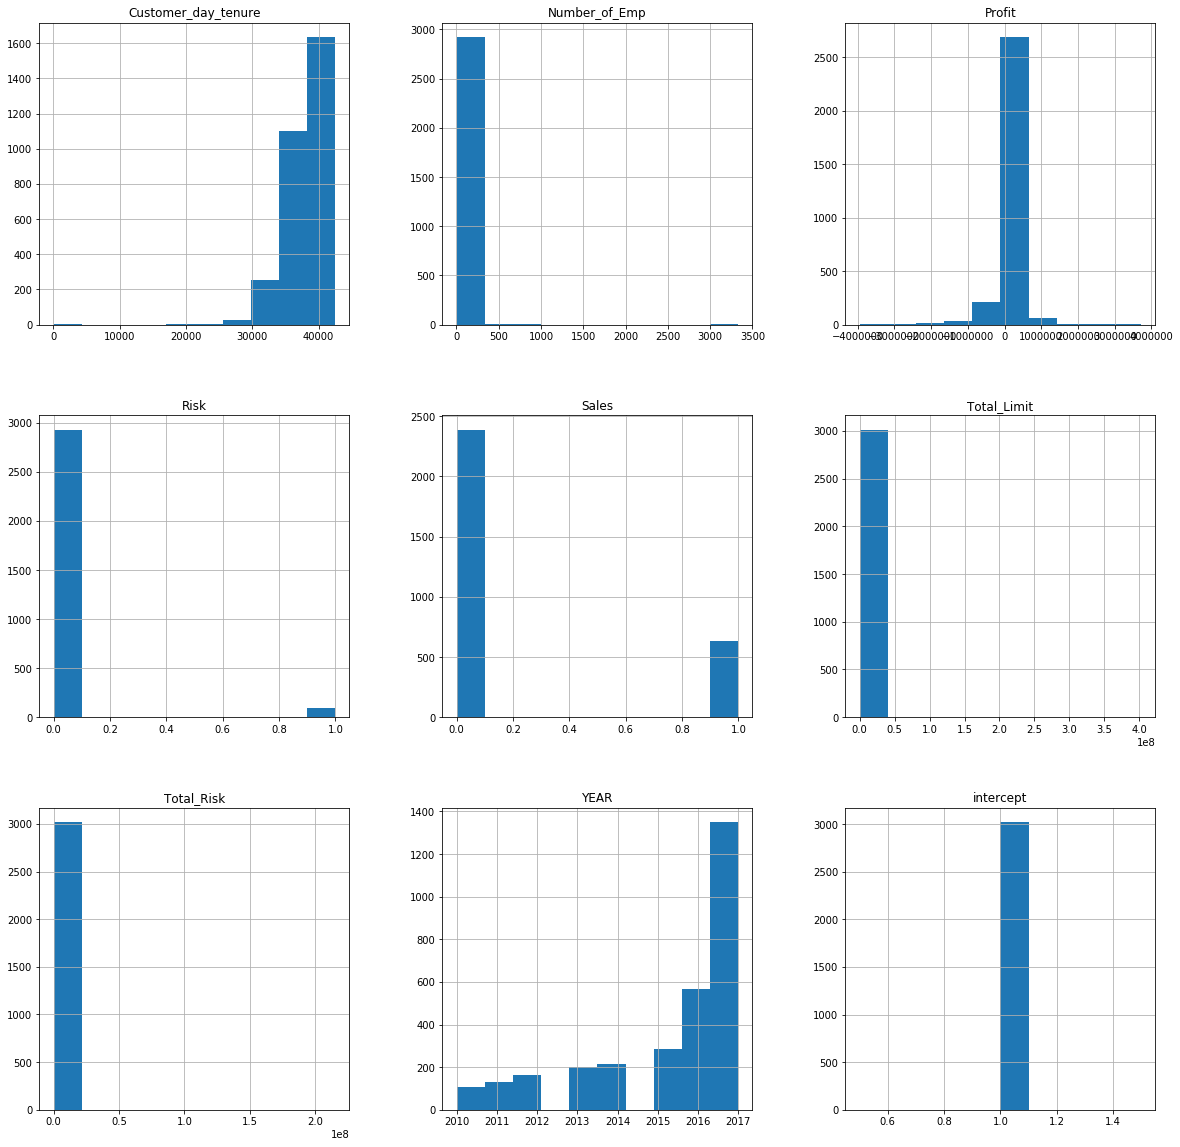

In [30]:
df_clean.hist(figsize=(20, 20))

Especially 'Total_Risk', 'Number_of_Emp' and 'Total_Limit' columns have outstanding outlier values; because, we cannot observe meaningful distrubutions. Before starting a model, they need to be standardized.

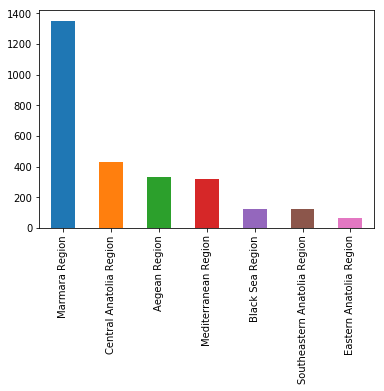

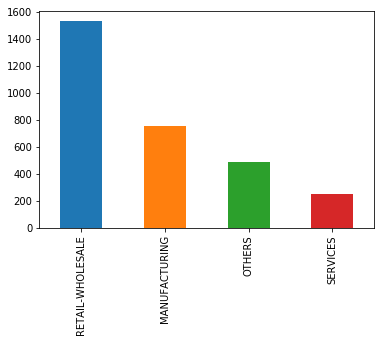

In [31]:
df_clean.Region.value_counts().head(40).plot.bar()
plt.show();
df_clean.Sector.value_counts().head(40).plot.bar()
plt.show();

Like we have seen in the main dataset, companies are mostly operates on retail sector in Marmara region. Before starting a model, dummy features should be created before start predictive analysis.

Text(0.5,1,'Correlation Map')

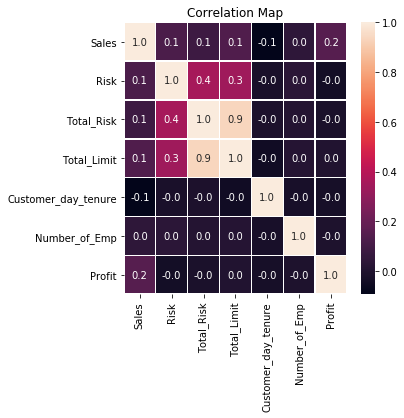

In [32]:
e,ea = plt.subplots(figsize=(5, 5))
sns.heatmap(df_clean[['Sales', 'Risk',
                      'Total_Risk', 'Total_Limit', 
                      'Customer_day_tenure', 'Number_of_Emp', 
                      'Profit']].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ea)
plt.title('Correlation Map')

* Sales feature has highest correlation with profit
* Sales has negative correlation only with customer tenure as we found out in the question3
* Total Risk and Total Limit features are highly correlated with each other. Therefore, one of them should be selected on the final model
* I was expecting to see high correlation with Risk and Total_Risk features; however, they are not

In [33]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3019 entries, RATI1000EDC to RATI9996WER
Data columns (total 12 columns):
YEAR                   3019 non-null int64
Customer_num           3019 non-null object
Customer_day_tenure    3019 non-null int64
Number_of_Emp          2930 non-null float64
Profit                 3019 non-null float64
Sector                 3019 non-null object
Region                 2750 non-null object
Total_Risk             3019 non-null float64
Total_Limit            3019 non-null float64
Sales                  3019 non-null int32
Risk                   3019 non-null int64
intercept              3019 non-null int64
dtypes: float64(4), int32(1), int64(4), object(3)
memory usage: 294.8+ KB


Number_of_Employees and Region features have missing values, should be filled.

<a id='Question5'></a>
## Question5

What is your assumptions of your model?

First, binary logistic regression requires the dependent variable to be binary.

Second, logistic regression requires the observations to be independent of each other.  In other words, the observations should not come from repeated measurements or matched data.

Third, logistic regression requires there to be little or no multicollinearity among the independent variables.  This means that the independent variables should not be too highly correlated with each other.

Fourth, logistic regression assumes linearity of independent variables and log odds.

Finally, logistic regression typically requires a large sample size.  A general guideline is that you need at minimum of 10 cases with the least frequent outcome for each independent variable in your model. For example, if you have 5 independent variables and the expected probability of your least frequent outcome is .10, then you would need a minimum sample size of 500 (10*5 / .10).


<a id='Question6'></a>
## Question6

Which methods did you apply for modeling?

I will use logistic regression. Before diving into modelling, creation of dummy values, missing treatment, train-test splitting and standardization should be studied.

##### Categorical Value Treatment / Creation of Dummies

In [34]:
df_clean.Sector.value_counts()

RETAIL-WHOLESALE    1532
MANUFACTURING        753
OTHERS               485
SERVICES             249
Name: Sector, dtype: int64

In [35]:
df_clean[['Retail_flag',
          'Manuf_flag', 
          'Other_flag']] = pd.get_dummies(df_clean['Sector'])[['RETAIL-WHOLESALE',
                                                               'MANUFACTURING',
                                                               'OTHERS']]

In [36]:
df_clean.Region.value_counts()

Marmara Region                  1352
Central Anatolia Region          433
Aegean Region                    330
Mediterranean Region             322
Black Sea Region                 126
Southeastern Anatolia Region     125
Eastern Anatolia Region           62
Name: Region, dtype: int64

In [37]:
df_clean[['marmara_flag',
          'central_anatolia_flag',
          'aegean_flag',
          'mediterranean_flag',
          'black_flag', 
          'southeastern-flag']] = pd.get_dummies(df_clean['Region'])[['Marmara Region',
                                                               'Central Anatolia Region',
                                                               'Aegean Region',
                                                                'Mediterranean Region', 
                                                                'Black Sea Region', 
                                                                'Southeastern Anatolia Region']]

In [38]:
df_clean.sample(5)

,YEAR,Customer_num,Customer_day_tenure,Number_of_Emp,Profit,Sector,Region,Total_Risk,Total_Limit,Sales,...,intercept,Retail_flag,Manuf_flag,Other_flag,marmara_flag,central_anatolia_flag,aegean_flag,mediterranean_flag,black_flag,southeastern-flag
Customer_num,,,,,,,,,,,,,,,,,,,,,
RATI2775MMJ,2016,RATI2775MMJ,39481,45.0,17595.0,SERVICES,Marmara Region,0.0,1426464.0,0,...,1,0,0,0,1,0,0,0,0,0
RATI6535NDB,2011,RATI6535NDB,31092,5.0,-783940.0,RETAIL-WHOLESALE,Central Anatolia Region,2337294.0,3297338.0,0,...,1,1,0,0,0,1,0,0,0,0
RATI1569USA,2015,RATI1569USA,38995,1.0,-2218.0,RETAIL-WHOLESALE,Marmara Region,15660.0,191903.0,0,...,1,1,0,0,1,0,0,0,0,0
RATI5043HRD,2016,RATI5043HRD,36188,9.0,20070.0,RETAIL-WHOLESALE,Black Sea Region,1110047.0,1932840.0,0,...,1,1,0,0,0,0,0,0,1,0
RATI7257BCX,2017,RATI7257BCX,35679,8.0,22097.0,OTHERS,Marmara Region,418087.0,3772877.0,0,...,1,0,0,1,1,0,0,0,0,0


##### Missing Treatment

There are many ways to fill missing values, even one of them is using machine learning algorithms like PCA. However, to make it easy in this case, I prefer to take median of the column; because, there are outlier values in the dataset.

In [39]:
imputer= Imputer(missing_values='NaN', strategy = 'median', axis=0 )


Number_of_Emp = df_clean.iloc[:,3:4].values
imputer = imputer.fit(Number_of_Emp)
Number_of_Emp = imputer.transform(Number_of_Emp)

# Converting numpy array to pandas dataframe
Number_of_Emp2 =pd.DataFrame(data = Number_of_Emp, index = range(3019), columns = ['Number_of_Emp_wo_missing'])
Number_of_Emp2.sample(4)

,Number_of_Emp_wo_missing
44,1.0
1045,1.0
1519,25.0
1533,2.0


In [40]:
# Reset indexing before joining dataframes

df_clean = df_clean.reset_index(drop=True)
df_clean.sample()# Joining dataframes

# Join dataframes
df_clean2 = pd.concat([df_clean, Number_of_Emp2], axis=1)
df_clean2.info()
df_clean3 = df_clean2.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3019 entries, 0 to 3018
Data columns (total 22 columns):
YEAR                        3019 non-null int64
Customer_num                3019 non-null object
Customer_day_tenure         3019 non-null int64
Number_of_Emp               2930 non-null float64
Profit                      3019 non-null float64
Sector                      3019 non-null object
Region                      2750 non-null object
Total_Risk                  3019 non-null float64
Total_Limit                 3019 non-null float64
Sales                       3019 non-null int32
Risk                        3019 non-null int64
intercept                   3019 non-null int64
Retail_flag                 3019 non-null uint8
Manuf_flag                  3019 non-null uint8
Other_flag                  3019 non-null uint8
marmara_flag                3019 non-null uint8
central_anatolia_flag       3019 non-null uint8
aegean_flag                 3019 non-null uint8
mediterranean_flag

##### Train-Test Splitting

There are many types of sampling method such as stratified random samplig, random sampling, under/over sampling, etc.Randomly sampled to dataset created %70 for train, %30 for test. 

In [41]:
df_clean3.drop(["YEAR","Customer_num", "Number_of_Emp", "Sector", "Region", "Total_Limit","Sales" ], axis=1, inplace=True)

df_clean3.head()

,Customer_day_tenure,Profit,Total_Risk,Risk,intercept,Retail_flag,Manuf_flag,Other_flag,marmara_flag,central_anatolia_flag,aegean_flag,mediterranean_flag,black_flag,southeastern-flag,Number_of_Emp_wo_missing
0,40206,39846.0,38795.0,0,1,1,0,0,1,0,0,0,0,0,13.0
1,33701,82182.0,4603985.0,0,1,0,0,1,1,0,0,0,0,0,20.0
2,38138,39176.0,669969.0,0,1,0,0,0,0,1,0,0,0,0,20.0
3,40224,95724.0,3288592.0,0,1,1,0,0,0,0,0,0,0,1,9.0
4,36161,58446.0,216474.0,0,1,0,1,0,1,0,0,0,0,0,33.0


In [42]:
x = df_clean3.values#independent varaibles
y = df_clean2["Sales"].values #dependent variable

x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.30, random_state=0)

#### Standardization 

Calculating the features how much standard deviation away from the mean.

In [43]:
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

#### Fitting Logistic Regression

In [44]:
logr = LogisticRegression(random_state=0)
logr.fit(X_train,y_train)
y_pred = logr.predict(X_test)
y_pred2 = logr.predict(X_train)

<a id='Question7'></a>
## Question7

What is your model result? How do you measure performance of your model?

Our aim to find out the clients which have higher than 5 mio net sales. Confusion matrix can be calculated; because, there is classification problem.

There are many performance metrics calcuted from confusion matrix. However, in our case, it is important to find overall accuracy value which indicates that how algortihm estimated both goods and bads and sensitivity value which shows that how good the algorithm is estimating the bads (true positive regocnition rate). Final but not least, it is also important to see recall value which indicates that how algoritmn performs good while predicting the bad.

In [45]:
cm_train = confusion_matrix(y_train,y_pred2)
cm_train

array([[1638,   31],
       [ 405,   39]], dtype=int64)

In [46]:
cm_test = confusion_matrix(y_test,y_pred)
cm_test

array([[706,  13],
       [175,  12]], dtype=int64)

In [47]:
accuracy_train = (1638+39)/(1638+39+31+405)
accuracy_test = (706+12)/(706+13+175+12)

print("Accuracy value on the train dataset: {}" . format(accuracy_train))
print("Accuracy value on the test dataset: {}" . format(accuracy_test))

Accuracy value on the train dataset: 0.7936583057264552
Accuracy value on the test dataset: 0.7924944812362031


There is stable performances on both train and test datasets. Model is classifing %79 correct both goods and bads.

In [48]:
Sensitivity_train = 1638/(1638+31)
Sensitivity_test = (706)/(706+13)

print("Sensitivity value on the train dataset: {}" . format(Sensitivity_train))
print("Sensitivity value on the test dataset: {}" . format(Sensitivity_test))

Sensitivity value on the train dataset: 0.981426003594967
Sensitivity value on the test dataset: 0.9819193324061196


Model captures %98 of bads correctly.

In [49]:
recall_train = (1638)/(1638+405)
recall_test = (706)/(706+12)

print("Recall value on the train dataset: {}" . format(recall_train))
print("Recall value on the test dataset: {}" . format(recall_test))

Recall value on the train dataset: 0.801762114537445
Recall value on the test dataset: 0.9832869080779945


Model is %98 correct while predicting bads